In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [388]:
df = pd.read_csv("BikeSharing.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [389]:
df.shape

(730, 16)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Looking at the dataframe info above, we can see that there are no null entries.

#### Lets map some columns for meaningful interpretation

In [391]:
# Month values to String

df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [392]:
# Season values to String

df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [393]:
# Weather values to String
df['weather'] = df['weathersit'].map({1:'Partly Cloudy', 2:'Misty Cloudy', 3:'Light Snow Rain', 4:'Heavy Rain Snow'})
df.drop('weathersit', axis=1, inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weather
0,1,01-01-2018,spring,0,January,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,Misty Cloudy
1,2,02-01-2018,spring,0,January,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,Misty Cloudy
2,3,03-01-2018,spring,0,January,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Partly Cloudy
3,4,04-01-2018,spring,0,January,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Partly Cloudy
4,5,05-01-2018,spring,0,January,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Partly Cloudy


#### weekday, workingday and holiday columns are trying to explain the same thing i.e. whether it was an off from work or not
#### It makes sense to combine them into one derived metric which shows whether it was a working or a non-working day. 

In [394]:

def calculateWorkingNonWorking(df):
    if(df.workingday == 0):
        return 0
    elif(df.weekday == 0 or df.weekday == 6):
        return 0
    elif(df.holiday==1):
        return 0
    return 1

In [396]:
df['working'] = df.apply(calculateWorkingNonWorking, axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weather,working
0,1,01-01-2018,spring,0,January,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,Misty Cloudy,0
1,2,02-01-2018,spring,0,January,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,Misty Cloudy,0
2,3,03-01-2018,spring,0,January,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Partly Cloudy,1
3,4,04-01-2018,spring,0,January,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Partly Cloudy,1
4,5,05-01-2018,spring,0,January,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Partly Cloudy,1


In [397]:
# Drop the columns not needed for analysis
df = df.drop(['holiday','weekday','workingday'], axis=1)
df.head()

,instant,dteday,season,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt,weather,working
0,1,01-01-2018,spring,0,January,14.110847,18.18125,80.5833,10.749882,331,654,985,Misty Cloudy,0
1,2,02-01-2018,spring,0,January,14.902598,17.68695,69.6087,16.652113,131,670,801,Misty Cloudy,0
2,3,03-01-2018,spring,0,January,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Partly Cloudy,1
3,4,04-01-2018,spring,0,January,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Partly Cloudy,1
4,5,05-01-2018,spring,0,January,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Partly Cloudy,1


### Univariate Analysis

In [ ]:
# lets look at basic corelation of the available numerical columns on our target variable "cnt" first.

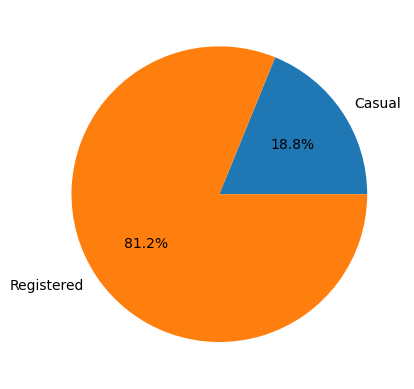

In [398]:
# We will see the share of casual and registered bikes usages
casSum = np.sum(df.casual)
regSum = np.sum(df.registered)
arr = [casSum, regSum]

plt.pie(x = arr, labels=['Casual','Registered'], autopct='%1.1f%%')
plt.show()

### Bivariate Analysis

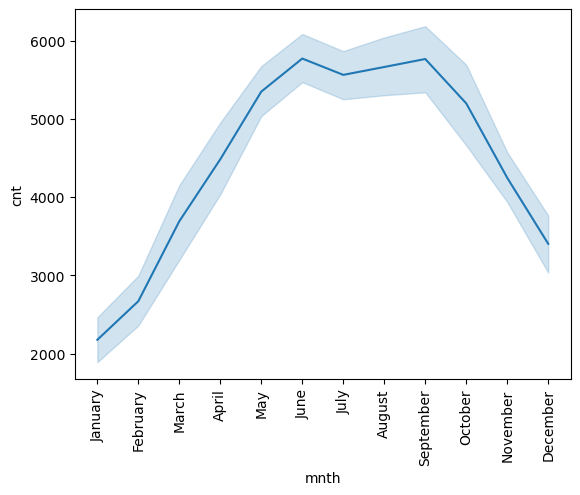

In [399]:
# mnth to cnt
sns.lineplot(x= df.mnth, y = df.cnt, data = df)
plt.xticks(rotation=90)
plt.show()

# It seems the demand is highest during the months of May - October i.e. during the season of Summer, Fall and Winter, but not in spring and early summer

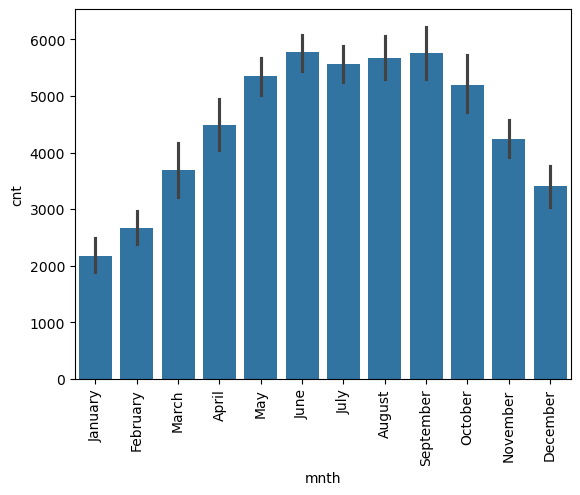

In [400]:
sns.barplot(x = df.mnth, y = df.cnt, data = df)
plt.xticks(rotation=90)
plt.show()

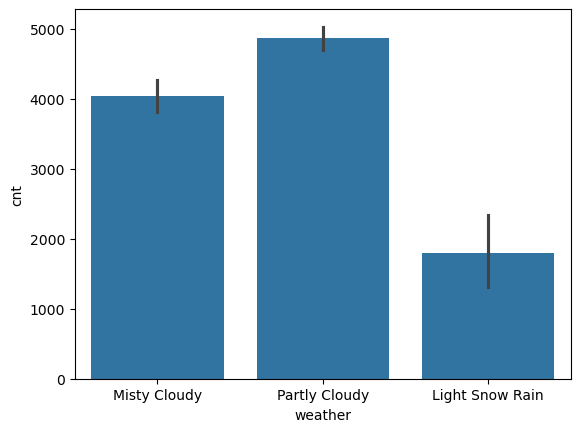

In [401]:
sns.barplot(x = df.weather, y = df.cnt, data = df)
plt.show()

# So the count is highest in weather condition "Clear, Few clouds, Partly cloudy", 
# still ok in "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
# But remarkably drops in more severe weather conditions like snow and heavy rain

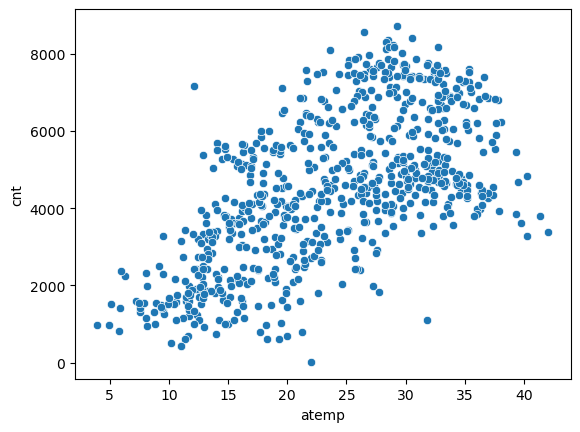

In [342]:
# Now lets see the impact of temperatures on demand

sns.scatterplot(x = df['atemp'], y = df.cnt, data=df)
plt.show()

# We clearly see a co-relation between temperature and demand. 
# As temperature increases upto 30 degree celsius, demand grows, but starts dropping therafter

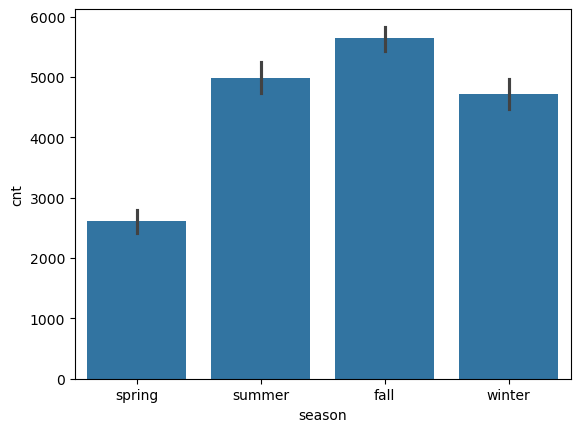

In [343]:
# Seasons vs demand

sns.barplot(x = df.season, y = df.cnt, data = df)
plt.show()

# Demand is highest in fall and summer, least in spring

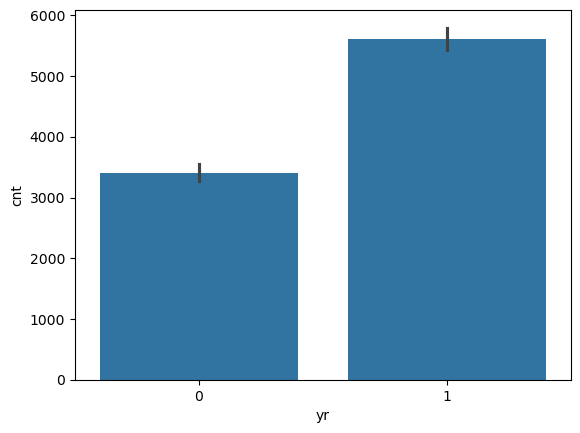

In [344]:
# Year vs Demand

sns.barplot(x = df['yr'], y = df['cnt'], data=df)
plt.show()

# Demand is significantly high in year 2019 as compared to 2018

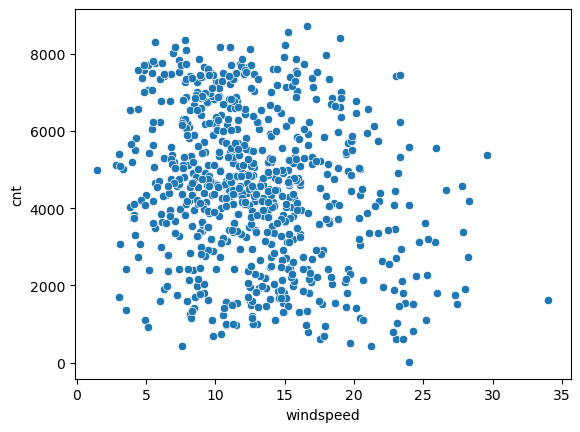

In [345]:
# windspeed vs demand

sns.scatterplot(x = df['windspeed'], y = df.cnt, data=df)
plt.show()

# We can say that demand remains high between wind speeds of 5 - 15 kmph

### Building the model

In [402]:
import statsmodels.api as sm

In [403]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'weather', 'working'],
      dtype='object')

In [404]:
# As dteday, instant does not seem to affect anything, using only the columns which seem to be useful for analysis. 

df1 = df[['season','yr','mnth','atemp','hum','windspeed','weather','working','cnt']]
df1.head()

,season,yr,mnth,atemp,hum,windspeed,weather,working,cnt
0,spring,0,January,18.18125,80.5833,10.749882,Misty Cloudy,0,985
1,spring,0,January,17.68695,69.6087,16.652113,Misty Cloudy,0,801
2,spring,0,January,9.47025,43.7273,16.636703,Partly Cloudy,1,1349
3,spring,0,January,10.60610,59.0435,10.739832,Partly Cloudy,1,1562
4,spring,0,January,11.46350,43.6957,12.522300,Partly Cloudy,1,1600


#### Dummy variables needed for columns 

In [405]:
# Dummy for weather

dummy_for_weather = pd.get_dummies(df1['weather'], dtype=int, drop_first=True)
df1 = pd.concat([df1, dummy_for_weather], axis=1)
df1.head()


,season,yr,mnth,atemp,hum,windspeed,weather,working,cnt,Misty Cloudy,Partly Cloudy
0,spring,0,January,18.18125,80.5833,10.749882,Misty Cloudy,0,985,1,0
1,spring,0,January,17.68695,69.6087,16.652113,Misty Cloudy,0,801,1,0
2,spring,0,January,9.47025,43.7273,16.636703,Partly Cloudy,1,1349,0,1
3,spring,0,January,10.60610,59.0435,10.739832,Partly Cloudy,1,1562,0,1
4,spring,0,January,11.46350,43.6957,12.522300,Partly Cloudy,1,1600,0,1


In [406]:
# Dummy for season

dummy_for_season = pd.get_dummies(df1['season'], dtype=int, drop_first=True)
df1 = pd.concat([df1, dummy_for_season], axis=1)
df1.head()

,season,yr,mnth,atemp,hum,windspeed,weather,working,cnt,Misty Cloudy,Partly Cloudy,spring,summer,winter
0,spring,0,January,18.18125,80.5833,10.749882,Misty Cloudy,0,985,1,0,1,0,0
1,spring,0,January,17.68695,69.6087,16.652113,Misty Cloudy,0,801,1,0,1,0,0
2,spring,0,January,9.47025,43.7273,16.636703,Partly Cloudy,1,1349,0,1,1,0,0
3,spring,0,January,10.60610,59.0435,10.739832,Partly Cloudy,1,1562,0,1,1,0,0
4,spring,0,January,11.46350,43.6957,12.522300,Partly Cloudy,1,1600,0,1,1,0,0


In [407]:
df.head()

,instant,dteday,season,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt,weather,working
0,1,01-01-2018,spring,0,January,14.110847,18.18125,80.5833,10.749882,331,654,985,Misty Cloudy,0
1,2,02-01-2018,spring,0,January,14.902598,17.68695,69.6087,16.652113,131,670,801,Misty Cloudy,0
2,3,03-01-2018,spring,0,January,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Partly Cloudy,1
3,4,04-01-2018,spring,0,January,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Partly Cloudy,1
4,5,05-01-2018,spring,0,January,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Partly Cloudy,1


#### Dummy for month
#### Month has 12 unique values, if we create dummy for month, we would get 11 new columns and might make the model complicated. 
#### Also, as per real world scenario, month should also be co-related with season and weather. Hence not using month in my model.


In [408]:
df1 = df1.drop(['weather', 'season','mnth'], axis=1)
df1.head()

,yr,atemp,hum,windspeed,working,cnt,Misty Cloudy,Partly Cloudy,spring,summer,winter
0,0,18.18125,80.5833,10.749882,0,985,1,0,1,0,0
1,0,17.68695,69.6087,16.652113,0,801,1,0,1,0,0
2,0,9.47025,43.7273,16.636703,1,1349,0,1,1,0,0
3,0,10.60610,59.0435,10.739832,1,1562,0,1,1,0,0
4,0,11.46350,43.6957,12.522300,1,1600,0,1,1,0,0


In [409]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   atemp          730 non-null    float64
 2   hum            730 non-null    float64
 3   windspeed      730 non-null    float64
 4   working        730 non-null    int64  
 5   cnt            730 non-null    int64  
 6   Misty Cloudy   730 non-null    int32  
 7   Partly Cloudy  730 non-null    int32  
 8   spring         730 non-null    int32  
 9   summer         730 non-null    int32  
 10  winter         730 non-null    int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 48.6 KB


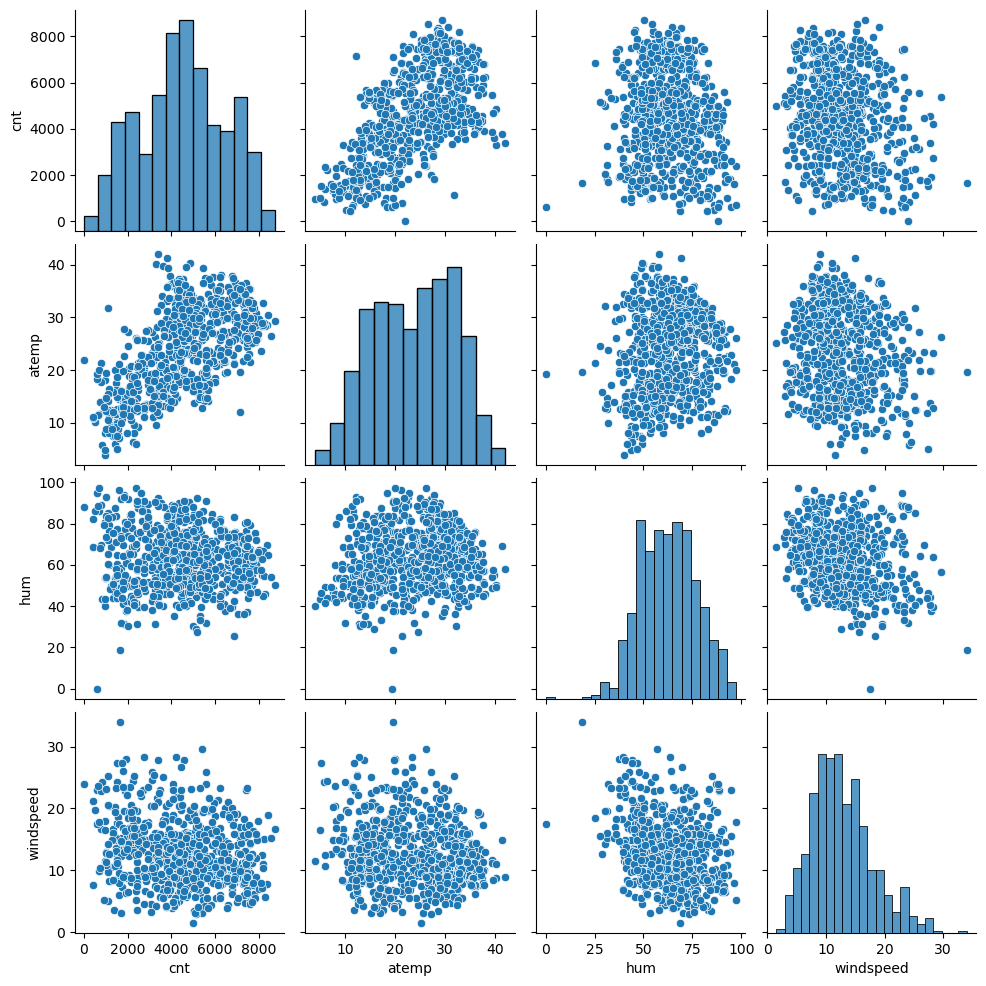

In [354]:
# Creating a pairplot

sns.pairplot(df1[['cnt','atemp','hum','windspeed']])
plt.show()

# Below pairplot show that the temperature and cnt variable has the strongest linear relationship.

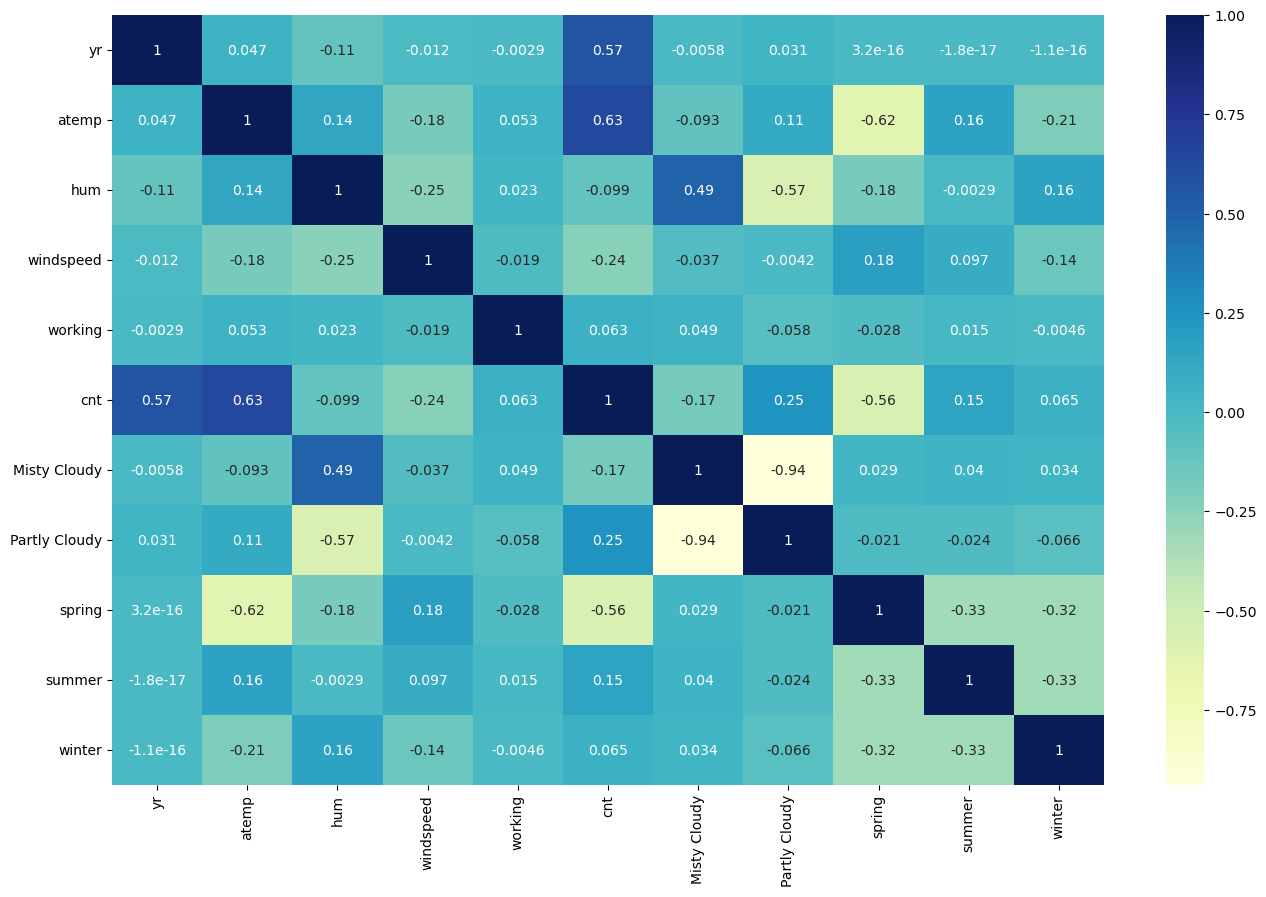

In [355]:
# Correlation matrix of all columns

plt.figure(figsize = (16, 10))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [410]:
df1.columns

Index(['yr', 'atemp', 'hum', 'windspeed', 'working', 'cnt', 'Misty Cloudy',
       'Partly Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [411]:
# From the above co-relation matrix we will pick the variables with highest co-relation co-efficients for our first model

df2 = df1[['yr','atemp','windspeed','Misty Cloudy', 'Partly Cloudy', 'spring', 'summer', 'winter', 'cnt']]

In [412]:
df2.head()

,yr,atemp,windspeed,Misty Cloudy,Partly Cloudy,spring,summer,winter,cnt
0,0,18.18125,10.749882,1,0,1,0,0,985
1,0,17.68695,16.652113,1,0,1,0,0,801
2,0,9.47025,16.636703,0,1,1,0,0,1349
3,0,10.60610,10.739832,0,1,1,0,0,1562
4,0,11.46350,12.522300,0,1,1,0,0,1600


### Splitting the Data into Training and Testing Sets

In [413]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [414]:
df_train.columns

Index(['yr', 'atemp', 'windspeed', 'Misty Cloudy', 'Partly Cloudy', 'spring',
       'summer', 'winter', 'cnt'],
      dtype='object')

In [415]:
print(df_train.shape, df_test.shape)

(510, 9) (219, 9)


### Rescaling the train set

In [416]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Using MinMaxScaler we are scaling the numerical columns aTemp and windspeed in values between 0 and 1, so that model co-efficients are 
# interpreted correctly.

df_train[['atemp', 'windspeed']] = scaler.fit_transform(df_train[['atemp', 'windspeed']])
df_train.head()

,yr,atemp,windspeed,Misty Cloudy,Partly Cloudy,spring,summer,winter,cnt
653,1,0.501133,0.300794,0,1,0,0,1,7534
576,1,0.766351,0.264686,0,1,0,0,0,7216
426,1,0.438975,0.255342,1,0,1,0,0,4066
728,1,0.200348,0.663106,0,1,1,0,0,1796
482,1,0.391735,0.188475,1,0,0,1,0,4220


### Dividing into X and Y train sets for model building

In [417]:
y_train = df_train.pop('cnt')
X_train = df_train

In [418]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
X_train_lm

,const,yr,atemp,windspeed,Misty Cloudy,Partly Cloudy,spring,summer,winter
653,1.0,1,0.501133,0.300794,0,1,0,0,1
576,1.0,1,0.766351,0.264686,0,1,0,0,0
426,1.0,1,0.438975,0.255342,1,0,1,0,0
728,1.0,1,0.200348,0.663106,0,1,1,0,0
482,1.0,1,0.391735,0.188475,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.762183,0.355596,1,0,0,1,0
578,1.0,1,0.824359,0.187140,0,1,0,0,0
53,1.0,0,0.218747,0.111379,0,1,1,0,0
350,1.0,0,0.223544,0.431816,1,0,0,0,1


In [419]:
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const            -261.718951
yr               2048.280124
atemp            4045.545282
windspeed       -1205.841407
Misty Cloudy     1709.940191
Partly Cloudy    2366.976189
spring           -909.102381
summer            207.157742
winter            472.766529
dtype: float64

In [420]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.74e-178
Time:                        17:34:21   Log-Likelihood:                -4156.2
No. Observations:                 510   AIC:                             8330.
Df Residuals:                     501   BIC:                             8368.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -261.7190    333.838     -0.784

#### According to above summary, summer has a high P-value of > 0.05 . Lets look at VIFs of all variables

### Analyzing VIF for all variables

In [425]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Partly Cloudy,13.76
1,atemp,11.32
3,Misty Cloudy,7.66
2,windspeed,4.51
5,spring,3.58
7,winter,2.30
6,summer,2.15
0,yr,2.07


In [426]:
# So we see above that weather 'Partly Cloudy' has the highest VIF. Lets drop this first to see the effect on our model results

X = X_train.drop('Partly Cloudy', axis=1)
X_train_lm = sm.add_constant(X)
X_train_lm

,const,yr,atemp,windspeed,Misty Cloudy,spring,summer,winter
653,1.0,1,0.501133,0.300794,0,0,0,1
576,1.0,1,0.766351,0.264686,0,0,0,0
426,1.0,1,0.438975,0.255342,1,1,0,0
728,1.0,1,0.200348,0.663106,0,1,0,0
482,1.0,1,0.391735,0.188475,1,0,1,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0.762183,0.355596,1,0,1,0
578,1.0,1,0.824359,0.187140,0,0,0,0
53,1.0,0,0.218747,0.111379,0,1,0,0
350,1.0,0,0.223544,0.431816,1,0,0,1


In [427]:
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [428]:
print(lr_2.summary())

# We see that our R-sqaured and adjusted R-squared values have dropped a bit, but they seem to be acceptable.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.48e-158
Time:                        17:36:28   Log-Likelihood:                -4206.4
No. Observations:                 510   AIC:                             8429.
Df Residuals:                     502   BIC:                             8463.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1950.1298    284.508      6.854   

#### So we now see that P-Value of summer has dropped to 0.05 now. Again lets see the VIFs

In [429]:
# Lets see the VIFs now
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Now we see all the VIFs dropped below 5. But still lets try dropping spring which has a high VIF of > 4 

,Features,VIF
0,const,47.58
5,spring,4.11
2,atemp,3.03
7,winter,2.69
6,summer,1.92
3,windspeed,1.09
1,yr,1.01
4,Misty Cloudy,1.01


In [430]:
# Lets drop spring with a high p-value and retrain the model
X = X_train_lm.drop('spring', axis=1)
X_train_lm = sm.add_constant(X)
X_train_lm

,const,yr,atemp,windspeed,Misty Cloudy,summer,winter
653,1.0,1,0.501133,0.300794,0,0,1
576,1.0,1,0.766351,0.264686,0,0,0
426,1.0,1,0.438975,0.255342,1,0,0
728,1.0,1,0.200348,0.663106,0,0,0
482,1.0,1,0.391735,0.188475,1,1,0
...,...,...,...,...,...,...,...
526,1.0,1,0.762183,0.355596,1,1,0
578,1.0,1,0.824359,0.187140,0,0,0
53,1.0,0,0.218747,0.111379,0,0,0
350,1.0,0,0.223544,0.431816,1,0,1


In [431]:
lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     277.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.32e-156
Time:                        17:37:35   Log-Likelihood:                -4215.0
No. Observations:                 510   AIC:                             8444.
Df Residuals:                     503   BIC:                             8474.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1003.8919    171.996      5.837   

In [432]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,16.85
6,winter,1.17
2,atemp,1.14
5,summer,1.14
3,windspeed,1.09
1,yr,1.01
4,Misty Cloudy,1.01


#### We see great improvement in our VIF values now. This means now the variables present in our model dont have multi-collinearity.
#### Also the p-values are acceptable

### Residual Analysis of the train data

In [433]:
y_train_cnt = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

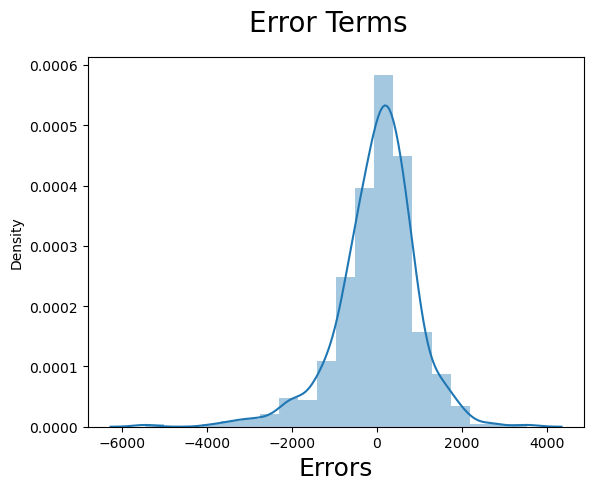

In [434]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   


#### We can see clearly from above distplot that the error terms are normally distributed.
#### This means that the model is working well with these variables and there no particular pattern and skewness which can be improved by
#### removing/adding any variables.

### Predicting using model 4

In [435]:
df_test

,yr,atemp,windspeed,Misty Cloudy,Partly Cloudy,spring,summer,winter,cnt
184,0,33.27085,5.459106,1,0,0,0,0,6043
535,1,36.04875,7.625404,0,1,0,1,0,6211
299,0,22.85230,13.250121,1,0,0,0,1,2659
221,0,34.24915,13.417286,0,1,0,0,0,4780
152,0,32.19710,19.583229,0,1,0,1,0,4968
...,...,...,...,...,...,...,...,...,...
400,1,13.22605,11.791732,1,0,1,0,0,2947
702,1,23.45270,11.666643,0,1,0,0,1,6606
127,0,25.94665,5.000712,0,1,0,1,0,4333
640,1,29.95665,4.458569,1,0,0,0,1,7572


In [436]:

df_test[['atemp', 'windspeed']] = scaler.transform(df_test[['atemp', 'windspeed']])
df_test.head()

,yr,atemp,windspeed,Misty Cloudy,Partly Cloudy,spring,summer,winter,cnt
184,0,0.769660,0.084219,1,0,0,0,0,6043
535,1,0.842587,0.153728,0,1,0,1,0,6211
299,0,0.496145,0.334206,1,0,0,0,1,2659
221,0,0.795343,0.339570,0,1,0,0,0,4780
152,0,0.741471,0.537414,0,1,0,1,0,4968


### Dividing into X_test and y_test

In [437]:
y_test = df_test.pop('cnt')
X_test = df_test

In [438]:
X_test_m3 = sm.add_constant(X_test)
X_test_m3 = X_test_m3.drop(['spring','Partly Cloudy'], axis=1)
X_test_m3.head()

,const,yr,atemp,windspeed,Misty Cloudy,summer,winter
184,1.0,0,0.769660,0.084219,1,0,0
535,1.0,1,0.842587,0.153728,0,1,0
299,1.0,0,0.496145,0.334206,1,0,1
221,1.0,0,0.795343,0.339570,0,0,0
152,1.0,0,0.741471,0.537414,0,1,0


In [439]:
y_pred_m3 = lr_3.predict(X_test_m3)
y_pred_m3

184    4413.364882
535    7921.138819
299    3501.819250
221    4709.317996
152    4738.306923
          ...     
400    3399.071947
702    6277.018886
127    4567.003946
640    6985.366481
72     2458.723797
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

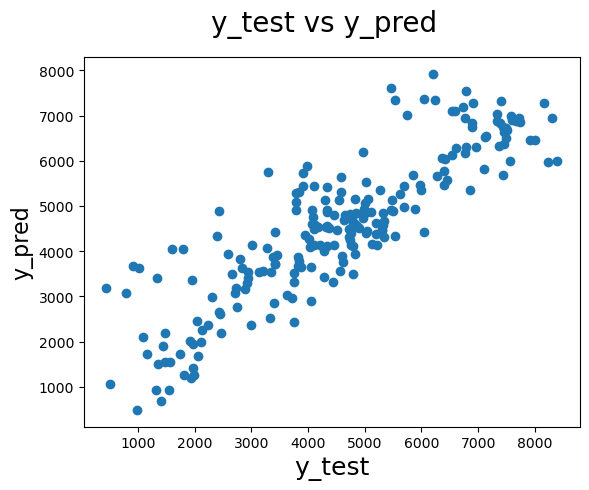

In [440]:
# Lets see the distribution of y actual and y predicted.
fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

#### We can see above that actual and predicted values falling in a linear line, that means the model is working acceptably. 

In [441]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m3)

0.756847460961376

### Hence getting a R2_score of 0.756 for the final model.

In [ ]:
# Hence Equation of our Linear Regression model is

const         1003.8919    171.996      5.837      0.000     665.973    1341.811
yr            2075.3028     84.299     24.618      0.000    1909.681    2240.925
atemp         5295.4750    211.275     25.064      0.000    4880.384    5710.566
windspeed    -1490.9861    257.498     -5.790      0.000   -1996.890    -985.082
Misty Cloudy  -540.6742     88.877     -6.083      0.000    -715.289    -366.059
summer         609.2490    104.184      5.848      0.000     404.560     813.938
winter         909.5742    104.828      8.677      0.000     703.620    1115.528

# 1003.8919 + 2075.3028*yr + 5295.4750*atemp -1490.9861*windspeed -540.6742*Misty Cloudy +609.2490*summer + 909.5742*winter

### So looking at the co-efficients we see increasing windspeed and harsh weather is reducing the demand for shared bikes. 
### For temperature, it a positive co-efficient. hence in general, a higher temperature which means less snow/rainfall, 
### has positive effect on the demand for bikes